<h1>Импорт библиотек

In [3]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [ ]:
import numpy as np

def sum_prod(X, V):
    assert len(X) == len(V), "Количество матриц и векторов должно совпадать"
    
    result = np.zeros_like(V[0])
    
    for A, v in zip(X, V):
        result += np.dot(A, v)
    
    return result

# Тесты
def test_sum_prod():
    X = [np.zeros((2, 2)), np.zeros((2, 2))]
    V = [np.zeros((2, 1)), np.zeros((2, 1))]
    result = sum_prod(X, V)
    expected = np.array([[0], [0]])
    assert np.array_equal(result, expected), f"Ошибка в тесте 1: {result} != {expected}"
    
    X = [np.array([[1]])]
    V = [np.array([[1]])]
    result = sum_prod(X, V)
    expected = np.array([[1]])
    assert np.array_equal(result, expected), f"Ошибка в тесте 2: {result} != {expected}"
    
    print("Все тесты пройдены")

test_sum_prod()

<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def binarize(M, threshold=0.5):
    return np.where(M > threshold, 1, 0)

def test_binarize():
    M = np.array([[0.3, 0.5, 0.7], [0.1, 0.6, 0.8]])
    expected_result = np.array([[0, 0, 1], [0, 1, 1]])
    assert np.array_equal(binarize(M), expected_result)

    M = np.array([[0.3, 0.5, 0.7], [0.1, 0.6, 0.8]])
    expected_result = np.array([[0, 1, 1], [0, 1, 1]])
    assert np.array_equal(binarize(M, 0.4), expected_result)

test_binarize()

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [ ]:
import numpy as np

def unique_rows(mat):
    return [set(row) for row in mat]
def unique_columns(mat):
    return [set(column) for column in zip(*mat)]

def test_unique():
    rows= [
        [1, 2, 3, 4, 5],
        [5, 6, 7, 7, 4],
        [5, 4, 4, 4, 3]
    ]

    assert unique_rows(rows)==[{1, 2, 3, 4, 5}, {4, 5, 6, 7}, {3, 4, 5}]
    columns =[
        [1, 1, 2, 9],
        [2, 2, 2, 5],
        [3, 2, 2, 7],
        [5, 3, 2, 6]
    ]
    
    assert unique_columns(columns) == [{1, 2, 3, 5}, {1, 2, 3}, {2}, {9, 5, 7, 6}]
    print("Все тесты пройдены")


test_unique()


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fill_matrix(m, n):
    matrix = np.random.normal(size=(m, n))

    #мат. ож и дисп
    row_mat_expectation = np.mean(matrix, axis=1)
    column_mat_expectation = np.mean(matrix, axis=0)
    row_dispersion = np.var(matrix, axis=1)
    column_dispersion = np.var(matrix, axis=0)

    #для строк
    plt.figure(figsize=(8, 6))
    for i in range(m):
        plt.hist(matrix[i], bins=10, alpha=0.5, label=f"Строка {i + 1}")
    plt.title('Гистограммы для строк')
    plt.xlabel('Значения')
    plt.ylabel('Частота')
    plt.legend()
    plt.show()
    # для столбцов
    plt.figure(figsize=(8, 6))
    for i in range(n):
        plt.hist(matrix[:, i], bins=10, alpha=0.5, label=f"Столбец {i + 1}")
    plt.title('Гистограммы для столбцов')
    plt.xlabel('Значения')
    plt.ylabel('Частота')
    plt.legend()
    plt.show()
    print(f"Матрица:\n{matrix}")
    print(f"Мат ожидания строк: {row_mat_expectation}")
    print(f"Мат ожидания столбцов: {column_mat_expectation}")
    print(f"Дисперсии строк: {row_dispersion}")
    print(f"Дисперсии столбцов: {column_dispersion}")
    return matrix, row_mat_expectation, column_mat_expectation, row_dispersion, column_dispersion

matrix, row_mat_expectation, column_mat_expectation, row_dispersion, column_dispersion = fill_matrix(3, 3)


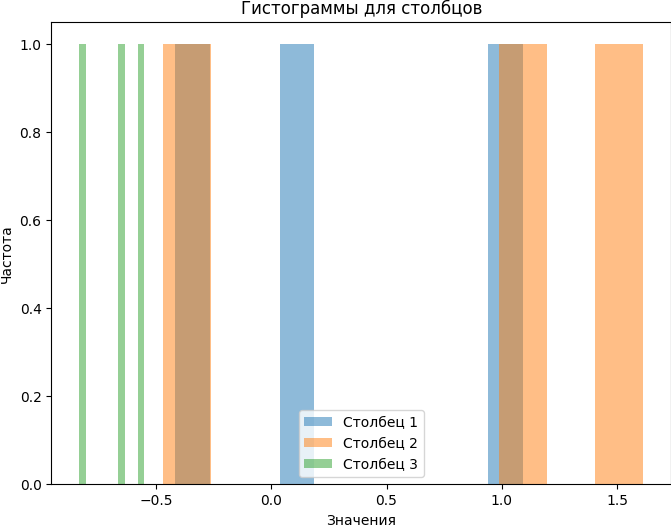

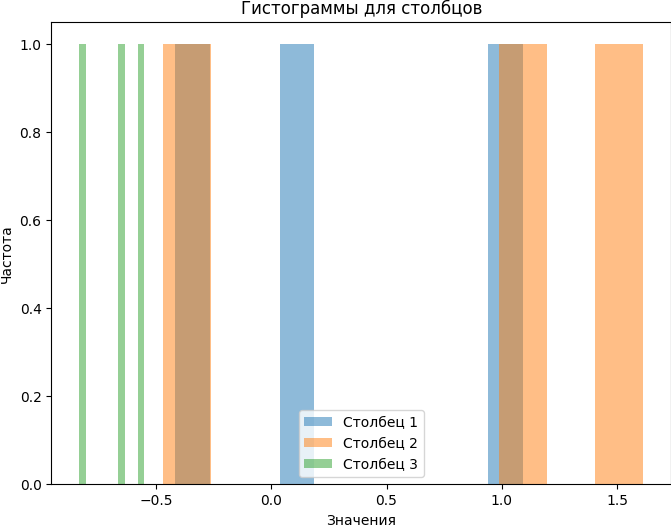

Матрица:
[[ 0.1808102   1.11147783 -0.55090046]
 [ 1.09070142  1.61345951 -0.83236723]
 [-0.41640188 -0.47199978 -0.65087577]]
Мат ожидания строк: [ 0.24712919  0.62393123 -0.51309248]
Мат ожидания столбцов: [ 0.28503658  0.75097919 -0.67804782]
Дисперсии строк: [0.4627827  1.10594861 0.01000731]
Дисперсии столбцов: [0.38399163 0.78983638 0.01357308]

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [ ]:
import numpy as np

def chess(m, n, a, b):
    mat = np.empty((m, n))
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                mat[i, j] = a
            else:
                mat[i, j] = b
    return mat

def test_chess():
    #2x2
    assert np.array_equal(chess(2, 2, 1, 0), np.array([[1, 0], [0, 1]]))

    #3x4
    assert np.array_equal(chess(3, 4, 1, 0), np.array([[1, 0, 1, 0], [0, 1, 0, 1],  [1, 0, 1, 0]]))

    # 4x3
    assert np.array_equal(chess(4, 3, 1, 0), np.array([[1, 0, 1],  [0, 1, 0],  [1, 0, 1],  [0, 1, 0]]))

    #3x3
    assert np.array_equal(chess(3, 3, 1, 0), np.array([[1, 0, 1],[0, 1, 0], [1, 0, 1]]))

    #отр числами
    assert np.array_equal(chess(2, 2, -1, 2), np.array([[-1, 2], [2, -1]]))

    #1x1
    assert np.array_equal(chess(1, 1, 7, 8), np.array([[7]]))
    print("Все тесты пройдены")
test_chess()


Все тесты пройдены

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_centered_rectangle(width, height, img_width, img_height, rect_color, bg_color):
    fig, ax = plt.subplots()
    ax.add_patch(patches.Rectangle((0, 0), img_width, img_height, color=bg_color))
    ax.add_patch(patches.Rectangle(((img_width - width) / 2, (img_height - height) / 2), width, height, color=rect_color))
    ax.set_xlim(0, img_width)
    ax.set_ylim(0, img_height)
    ax.axis('off')
    plt.show()

def draw_centered_ellipse(semi_major, semi_minor, img_width, img_height, ellipse_color, bg_color):
    fig, ax = plt.subplots()
    ax.add_patch(patches.Rectangle((0, 0), img_width, img_height, color=bg_color))
    ax.add_patch(patches.Ellipse((img_width / 2, img_height / 2), semi_major * 2, semi_minor * 2, color=ellipse_color))
    ax.set_xlim(0, img_width)
    ax.set_ylim(0, img_height)
    ax.axis('off')
    plt.show()

draw_centered_rectangle(60, 100, 140, 350, "#FF5733", "lightgrey")
draw_centered_ellipse(60, 100, 140, 350, "#33FF57", "lightgrey")


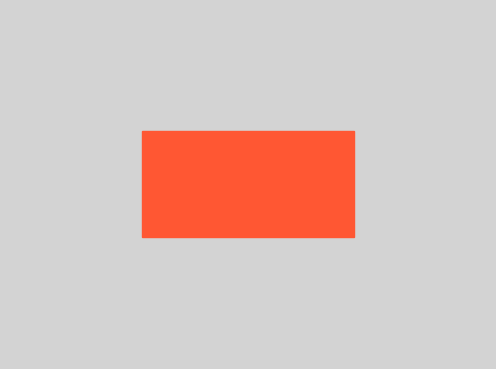

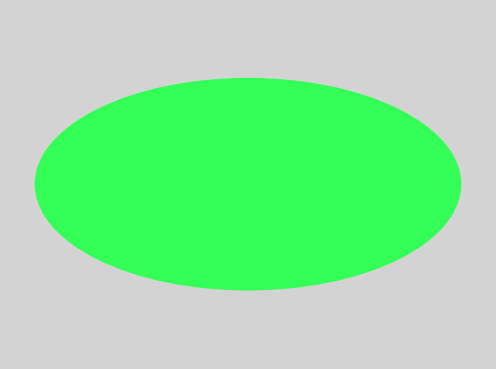

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [ ]:
import numpy as np
import pandas as pd
from scipy.signal import argrelextrema

def analyze_time_series(data, p):
    data = np.array(data)
    mean = np.mean(data)
    variance = np.var(data)
    std_dev = np.std(data)
    local_max = argrelextrema(data, np.greater)[0]
    local_min = argrelextrema(data, np.less)[0]
    rolling_mean = pd.Series(data).rolling(window=p).mean().to_numpy()
    
    return {
        'mean': mean,
        'variance': variance,
        'std_dev': std_dev,
        'local_max': local_max,
        'local_min': local_min,
        'rolling_mean': rolling_mean
    }

time_series_data = [1, 3, 2, 5, 4, 6, 5, 3, 4, 7, 6]
window_size = 3

results = analyze_time_series(time_series_data, window_size)

print("Мат ожидание:", results['mean'])
print("Дисперсия:", results['variance'])
print("Стандартное отклонение:", results['std_dev'])
print("Локальные максимумы:", results['local_max'])
print("Локальные минимумы:", results['local_min'])
print("Скользящее среднее:", results['rolling_mean'])


Мат ожидание: 4.181818181818182
Дисперсия: 3.057851239669421
Стандартное отклонение: 1.7486712783337586
Локальные максимумы: [1 3 5 9]
Локальные минимумы: [2 4 7]
Скользящее среднее: [       nan        nan 2.         3.33333333 3.66666667 5.
 5.         4.66666667 4.         4.66666667 5.66666667]

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [ ]:
def one_hot_encoding(mask):
    n = np.max(mask) + 1
    res = np.zeros((len(mask), n), dtype=int)
    for i, j in enumerate(mask):
        res[i, j] = 1
    return res


def tests():
    M = np.array([0, 2, 3, 0])
    res = one_hot_encoding(M)
    assert np.array_equal(res, np.array([[1, 0, 0, 0],
                                        [0, 0, 1, 0],
                                        [0, 0, 0, 1],
                                        [1, 0, 0, 0]]))
    print("Все тесты пройдены")

tests()